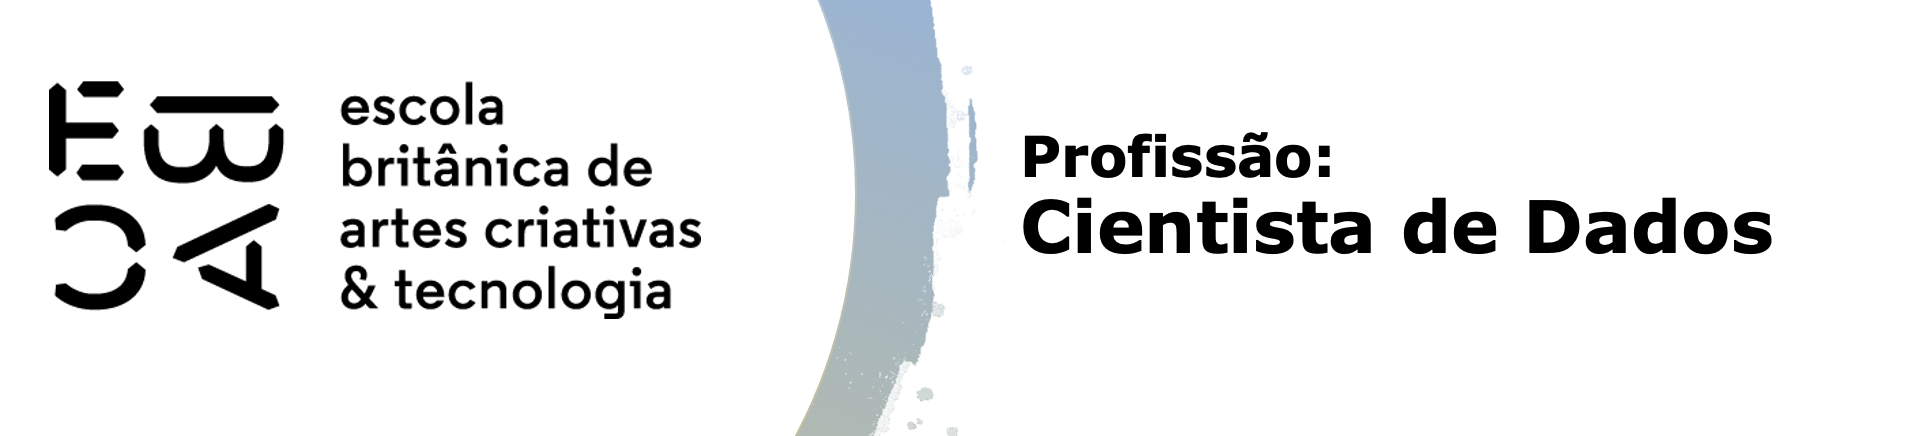

# Árvores II - Tarefa 3

### 1. Carregar as bases

Vamos utilizar nesta tarefa as bases de reconhecimento de atividade humana através do celular. Carregue novamente as bases salvas na tarefa I.

In [194]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay , confusion_matrix
from sklearn.model_selection import GridSearchCV

In [195]:
X_train = pd.read_csv('X_train.csv',index_col=[0,1])
y_train = pd.read_csv('y_train.csv',index_col=0)
X_test = pd.read_csv('X_test.csv',index_col=[0,1])
y_test = pd.read_csv('y_test.csv',index_col=0)

### 2. Calcule os ```ccp_alphas```. 

Vamos seguir uma lógica bem em linha com o que já estamso acostumados, com as seguintes orientações:

- Utilizar treinamento e teste conforme já vieram definidos originalmente
- Por pragmatismo, utilizar ```min_samples_leaf=20```
- Utilize as mesmas "3 melhores variáveis" identificadas no exercício anterior.

In [196]:
tree = DecisionTreeClassifier(random_state=17,min_samples_leaf=20)
tree.fit(X_train,y_train)
importances = tree.feature_importances_
sorted_indices = np.argsort(importances)[::-1]



X_train = X_train.iloc[:,sorted_indices[:3]]
X_test = X_test.iloc[:,sorted_indices[:3]]

tree = DecisionTreeClassifier(random_state=17,min_samples_leaf=20)
tree.fit(X_train,y_train)



DecisionTreeClassifier(min_samples_leaf=20, random_state=17)

In [197]:
caminho = tree.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = caminho.ccp_alphas, caminho.impurities

trees = []
for alpha in ccp_alphas:
    tree = DecisionTreeClassifier(ccp_alpha=alpha,random_state=17).fit(X_train,y_train)
    trees.append(tree)

In [198]:
ccp_alphas = np.unique(ccp_alphas[ccp_alphas>=0])

### 3. *Grid Search*

Vou deixar especificações iniciais mínimas, que visam limitar o tempo de máquina, pois um procedimento desses pode demorar muito tempo dependendo da especificação. Mas conforme você for ficando confortável com o tempo consumido pelo procedimento, pode fazer um algoritmo mais exaustivo, por exemplo, avaliando mais valores de ```ccp_alpha```.

- Meça o tempo
- Utilize a base de treinamento
- Utilize um *cross validation* do tipo *k-fold*, especifique k=10
- Você pode ler 1 a cada ```k``` valores para uma melhor varredura utilizando, por exemplo, ```ccp_alpha[::10]```
- Não se esqueça de limitar o número de variáveis

In [199]:
%%time 
grid_parametros = {'ccp_alpha':ccp_alphas}
grid = GridSearchCV(estimator = tree, param_grid=grid_parametros,cv=10)
grid.fit(X_train, y_train) 


CPU times: user 16.3 s, sys: 244 ms, total: 16.6 s
Wall time: 16.6 s


GridSearchCV(cv=10,
             estimator=DecisionTreeClassifier(ccp_alpha=0.1861382417305819,
                                              random_state=17),
             param_grid={'ccp_alpha': array([0.00000000e+00, 5.73823449e-06, 6.59906426e-06, 7.22842411e-06,
       8.46900856e-06, 8.47900739e-06, 9.06782735e-06, 1.05466513e-05,
       1.11989757e-05, 1.19905305e-05, 1.23872999e-05, 2.26695684e-05,
       2.62319291e-05, 2.78669816e-05, 3.35509612e...
       1.48587311e-03, 1.79464489e-03, 1.79719950e-03, 1.88062105e-03,
       1.90094443e-03, 1.90782047e-03, 2.04607727e-03, 2.04997637e-03,
       2.12674961e-03, 2.16385984e-03, 2.24422866e-03, 2.49959739e-03,
       2.59007682e-03, 2.79693358e-03, 3.26048062e-03, 3.60621242e-03,
       4.20267585e-03, 5.31083069e-03, 5.34572911e-03, 6.88407984e-03,
       8.24712763e-03, 1.17255727e-02, 4.41235910e-02, 4.67250302e-02,
       1.09363718e-01, 1.67257720e-01, 1.86138242e-01])})

In [200]:
resultados = pd.DataFrame(grid.cv_results_)
resultados.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_ccp_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.012608,0.000504,0.001229,0.000121,0.0,{'ccp_alpha': 0.0},0.779891,0.716033,0.836735,0.682993,0.729252,0.77415,0.782313,0.779592,0.809524,0.746939,0.763742,0.043194,77
1,0.012310,0.000194,0.001045,0.000026,0.000006,{'ccp_alpha': 5.738234494015275e-06},0.779891,0.716033,0.836735,0.682993,0.729252,0.77415,0.782313,0.779592,0.809524,0.746939,0.763742,0.043194,77
2,0.012260,0.000175,0.001044,0.000051,0.000007,{'ccp_alpha': 6.599064264795887e-06},0.779891,0.716033,0.836735,0.682993,0.729252,0.77415,0.782313,0.779592,0.809524,0.746939,0.763742,0.043194,77
3,0.012262,0.000225,0.001033,0.000039,0.000007,{'ccp_alpha': 7.228424107573841e-06},0.779891,0.716033,0.836735,0.682993,0.729252,0.77415,0.782313,0.779592,0.809524,0.746939,0.763742,0.043194,77
4,0.012316,0.000208,0.001064,0.000078,0.000008,{'ccp_alpha': 8.469008561397511e-06},0.779891,0.716033,0.836735,0.682993,0.729252,0.77415,0.782313,0.779592,0.809524,0.746939,0.763742,0.043194,77


In [201]:
grid.best_score_

0.7908028320023661

### 4. Avaliando a árvore

- Obtenha a árvore na melhor configuração treinada em toda a base de treino
- Calcule a acurácia dessa árvore na base de testes
- Visualize a matriz de confusão

In [202]:
melhor_ccp = resultados.iloc[grid.best_index_,4]
clf = DecisionTreeClassifier(random_state=2360873, ccp_alpha=melhor_ccp).fit(X_train, y_train)

In [203]:
print(clf.score(X_test, y_test))
y_pred = clf.predict(X_test)

0.7112317611129962


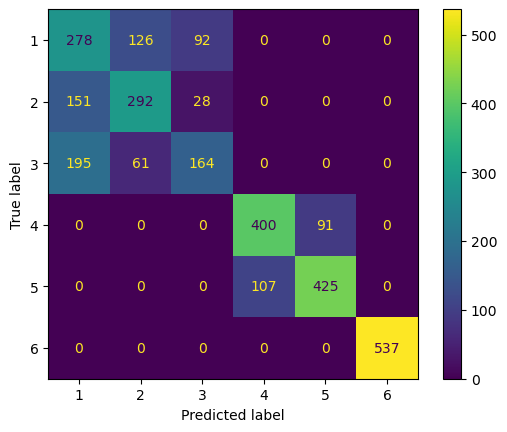

In [204]:
cm = confusion_matrix(y_test, y_pred , labels=clf.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()

### 5. Melhorando a árvore

A melhor forma de se melhorar um algoritmo é colocando nele novas variáveis que agreguem valor. Podemos usar a força-bruta e ir colocando variáveis aleatoriamente - ou colocar todas e deixar rodando por um bom tempo - ou utilizar uma lógica eficiente e fazer uma seleção de variáveis.

- Observe que há classes mais fáceis e mais difíceis de se identificar
- Crie uma variável binária para uma das classes de maior erro
- Fala uma árvore de classificação bem simples para esta variável:
    - utilize ```mean_samples_leaf=20```
    - utilize ```max_depth=4```
    - coloque todas as variáveis
- Observe a importância das variáveis, e selecione as 3 com maior importância
- Rode novamente o algoritmo acima com as 3 novas variáveis e avalie a acurácia

In [205]:
X_train = pd.read_csv('X_train.csv',index_col=[0,1])
y_train = pd.read_csv('y_train.csv',index_col=0)
X_test = pd.read_csv('X_test.csv',index_col=[0,1])
y_test = pd.read_csv('y_test.csv',index_col=0)

In [206]:
tree_class = DecisionTreeClassifier(min_samples_leaf=20,max_depth=4)
#identifiquei pela confusion matrix a classe 3 e vou crirar a binary 
class_with_higher_error = 3

binary_variable = (y_train == class_with_higher_error).astype(int)
y_classe = binary_variable

#usando a binary agora como variavel resposta e pegando a variaveis com maior importancia.
tree_class.fit(X_train,y_classe)
importances = tree_class.feature_importances_
sorted_indices = np.argsort(importances)[::-1]



In [207]:
#treinando com essas variaveis
X_train = X_train.iloc[:,sorted_indices[:3]]
X_test = X_test.iloc[:,sorted_indices[:3]]

tree = DecisionTreeClassifier(random_state=17,min_samples_leaf=20)
tree.fit(X_train,y_train)


caminho = tree.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = caminho.ccp_alphas, caminho.impurities

trees = []
for alpha in ccp_alphas:
    tree = DecisionTreeClassifier(ccp_alpha=alpha,random_state=17).fit(X_train,y_train)
    trees.append(tree)

ccp_alphas = np.unique(ccp_alphas[ccp_alphas>=0])

In [208]:
grid_parametros = {'ccp_alpha':ccp_alphas}
grid = GridSearchCV(estimator = tree, param_grid=grid_parametros,cv=10)
grid.fit(X_train, y_train) 
grid.best_score_

0.5567269299023957

In [209]:
resultados = pd.DataFrame(grid.cv_results_)
resultados.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_ccp_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.018487,0.000396,0.001370,0.000351,0.0,{'ccp_alpha': 0.0},0.483696,0.47962,0.497959,0.482993,0.508844,0.531973,0.519728,0.508844,0.555102,0.519728,0.508849,0.02277,161
1,0.018575,0.000291,0.001143,0.000059,0.000004,{'ccp_alpha': 4.427186848472394e-06},0.483696,0.47962,0.497959,0.482993,0.508844,0.531973,0.519728,0.508844,0.555102,0.519728,0.508849,0.02277,161
2,0.018476,0.000297,0.001094,0.000020,0.000006,{'ccp_alpha': 6.489617856440718e-06},0.483696,0.47962,0.497959,0.482993,0.508844,0.531973,0.519728,0.508844,0.555102,0.519728,0.508849,0.02277,161
3,0.018432,0.000269,0.001102,0.000052,0.000007,{'ccp_alpha': 7.124721488159969e-06},0.483696,0.47962,0.497959,0.482993,0.508844,0.531973,0.519728,0.508844,0.555102,0.519728,0.508849,0.02277,161
4,0.019103,0.000611,0.001244,0.000153,0.000007,{'ccp_alpha': 7.275349849432194e-06},0.483696,0.47962,0.497959,0.482993,0.508844,0.531973,0.519728,0.508844,0.555102,0.519728,0.508849,0.02277,161


In [210]:
melhor_ccp = resultados.iloc[grid.best_index_,4]
clf = DecisionTreeClassifier(random_state=2360873, ccp_alpha=melhor_ccp).fit(X_train, y_train)

print(clf.score(X_test, y_test))
y_pred = clf.predict(X_test)

0.5585341024770953


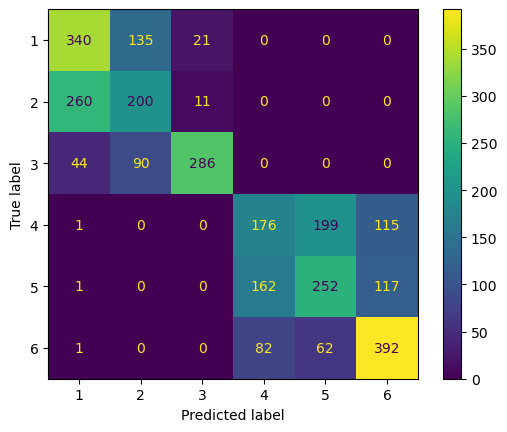

In [211]:
cm = confusion_matrix(y_test, y_pred , labels=clf.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()

Esse modelo obteve um resultado bem superior nessa classe em especifico, mas piorou em relacao as outra(era de se esperar), um modelo que usasse essas 6 variaveis provavelmente obteria um resultado melhor e mais generalista.

In [212]:
X_train = pd.read_csv('X_train.csv',index_col=[0,1])
y_train = pd.read_csv('y_train.csv',index_col=0)
X_test = pd.read_csv('X_test.csv',index_col=[0,1])
y_test = pd.read_csv('y_test.csv',index_col=0)